In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
my_data_dir =  'C:/Users/ASUS/Desktop/label/'
train_path = my_data_dir + 'train/'
test_path = my_data_dir + 'test/'

image_shape = (500,217,1)
batch_size = 16

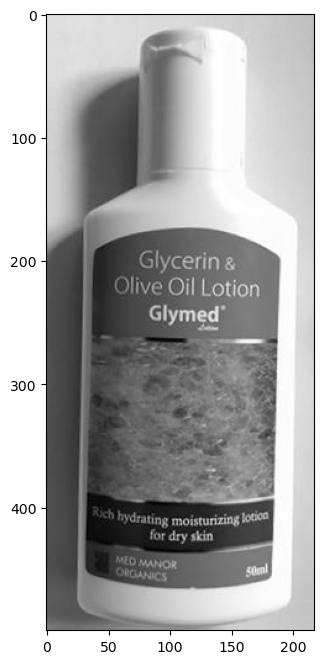

In [5]:
img = plt.imread('C:/Users/ASUS/Desktop/label/train/ok/def_0_341.jpeg')
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')

In [6]:
image_gen = ImageDataGenerator(rescale=1/255)

In [7]:
train_set = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=True)

test_set = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 264 images belonging to 2 classes.
Found 82 images belonging to 2 classes.


In [8]:
train_set.class_indices

{'def': 0, 'ok': 1}

In [9]:
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))




model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))

# Last layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [10]:
results = model.fit_generator(train_set,epochs=20,
                              validation_data=test_set,
                             callbacks=[early_stop])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14628\3491588615.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_set,epochs=20,


Epoch 1/20
17/17 [==============================] - 14s 727ms/step - loss: 0.6866 - accuracy: 0.6023 - val_loss: 0.6017 - val_accuracy: 0.5488
Epoch 2/20
17/17 [==============================] - 11s 685ms/step - loss: 0.3064 - accuracy: 0.8864 - val_loss: 0.3080 - val_accuracy: 0.8537
Epoch 3/20
17/17 [==============================] - 11s 655ms/step - loss: 0.1432 - accuracy: 0.9318 - val_loss: 0.2025 - val_accuracy: 0.9390
Epoch 4/20
17/17 [==============================] - 11s 649ms/step - loss: 0.0965 - accuracy: 0.9545 - val_loss: 0.1548 - val_accuracy: 0.9634
Epoch 5/20
17/17 [==============================] - 11s 655ms/step - loss: 0.0661 - accuracy: 0.9735 - val_loss: 0.1438 - val_accuracy: 0.9512
Epoch 6/20
17/17 [==============================] - 11s 648ms/step - loss: 0.0314 - accuracy: 0.9886 - val_loss: 0.1590 - val_accuracy: 0.9146
Epoch 7/20
17/17 [==============================] - 11s 653ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 0.0597 - val_accuracy: 0.9756

In [12]:
pred_probability = model.predict(test_set)

6/6 [==============================] - 1s 164ms/step


In [13]:
predictions = pred_probability > 0.5

In [14]:
print(classification_report(test_set.classes,predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        41
           1       0.95      1.00      0.98        41

    accuracy                           0.98        82
   macro avg       0.98      0.98      0.98        82
weighted avg       0.98      0.98      0.98        82



<AxesSubplot:>

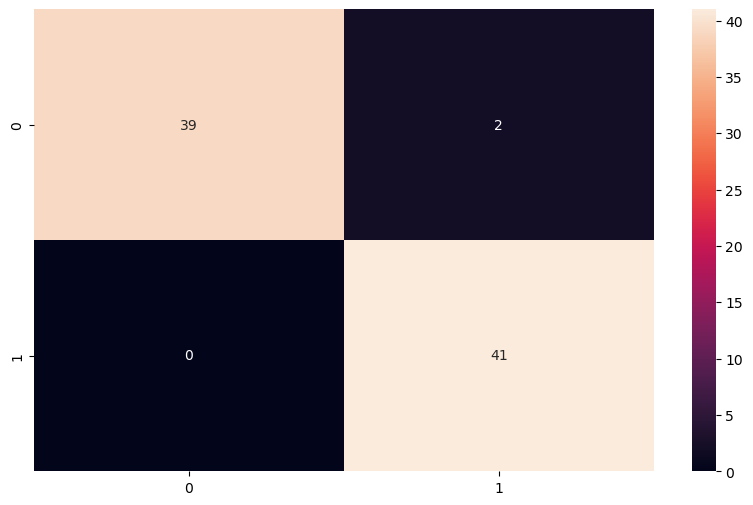

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(test_set.classes,predictions),annot=True)

In [16]:
img = cv2.imread(train_path+'ok/def_0_635.jpeg',0)
img = img/255 #rescalinng
pred_img =img.copy()

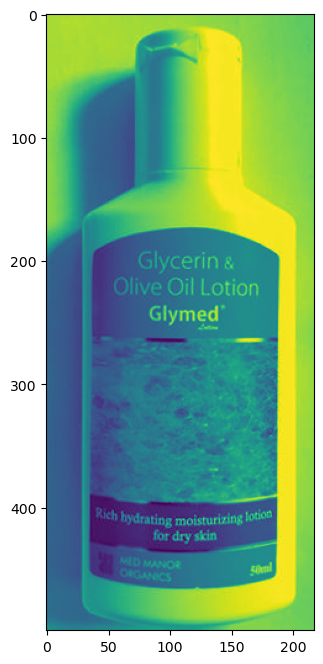

In [17]:
plt.figure(figsize=(12,8))
plt.imshow(img)

1/1 [==============================] - 0s 189ms/step
[[0.9999669]]
ok_front


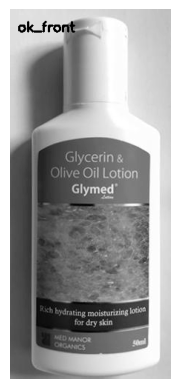

In [18]:
prediction = model.predict(img.reshape(-1,500,217,1))
print(prediction)
if (prediction<0.5):
    print("def_front")
    cv2.putText(pred_img, "def_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
else:
    print("ok_front")
    cv2.putText(pred_img, "ok_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
plt.imshow(pred_img,cmap='gray')
plt.axis('off')
plt.show()

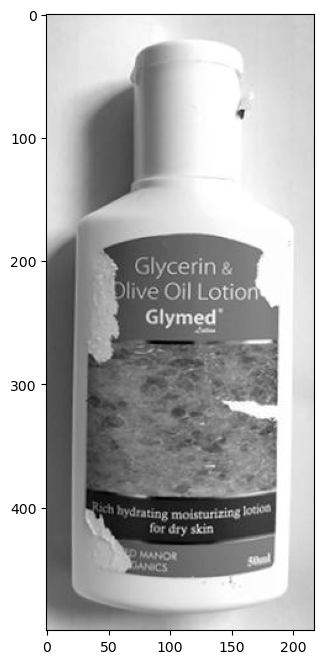

In [19]:
img1 = cv2.imread(test_path+'def/def_0_438.jpeg',0)
img1 = img1/255
pred_img1 =img1.copy()
plt.figure(figsize=(12,8))
plt.imshow(img1,cmap='gray')

1/1 [==============================] - 0s 64ms/step
def_front


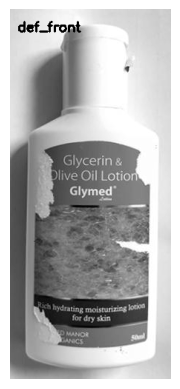

In [20]:
prediction = model.predict(img1.reshape(-1,500,217,1))
if (prediction<0.5):
    print("def_front")
    cv2.putText(pred_img1, "def_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
else:
    print("ok_front")
    cv2.putText(pred_img1, "ok_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
plt.imshow(pred_img1,cmap='gray')
plt.axis('off')
plt.show()

In [21]:
prediction = model.predict(img1.reshape(-1,500,217,1))

1/1 [==============================] - 0s 63ms/step


In [23]:
print(prediction)

[[0.00350154]]


In [1]:
import cv2
from tensorflow import keras

model = keras.models.load_model("label_inspection.h5")
cap = cv2.VideoCapture(1)

while True:
    ret, frame = cap.read()
    if ret:

        
        cv2.rectangle(frame, (200, 0), (420, 500), (255, 255, 255), 3)
        # rectangle for computer to play


        # extract the region of image within the user rectangle
        roi = frame[0:500, 200:420]
        img = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
        img = cv2.resize(img, (217, 500))
        img1 = img
        img1 = img1/255
        prediction = model.predict(img1.reshape(-1,500,217,1))
        print(prediction)
        
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        if (prediction>0.5):
            print("ok")
            
            cv2.putText(frame, "OK",(50, 50), font, 1.2, (0, 255, 0), 2, cv2.LINE_AA)
            
            
        else:
            print("defective")
            cv2.putText(frame, "Defective",(50, 50), font, 1.2, (0, 0, 255), 2, cv2.LINE_AA)
            
                
        cv2.imshow('Color Frame', frame) 
        key = cv2.waitKey(50)
        if key == ord('q'):
            break
        
    else:
        print('Frame not available')
        print(cap.isOpened())

    # rectangle for user to play



cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 1s 545ms/step
[[0.9653343]]
ok
1/1 [==============================] - 0s 79ms/step
[[0.00010744]]
defective
1/1 [==============================] - 0s 83ms/step
[[0.00010822]]
defective
1/1 [==============================] - 0s 76ms/step
[[0.00010536]]
defective
1/1 [==============================] - 0s 75ms/step
[[0.00010458]]
defective
1/1 [==============================] - 0s 66ms/step
[[0.00010618]]
defective
1/1 [==============================] - 0s 76ms/step
[[9.5788135e-05]]
defective
1/1 [==============================] - 0s 67ms/step
[[0.00010196]]
defective
1/1 [==============================] - 0s 79ms/step
[[0.00010242]]
defective
1/1 [==============================] - 0s 77ms/step
[[0.00012456]]
defective
1/1 [==============================] - 0s 63ms/step
[[3.7380687e-06]]
defective
1/1 [==============================] - 0s 80ms/step
[[7.047309e-08]]
defective
1/1 [==============================] - 0s 66ms/step
[[2.2563858e-08]]
defec

1/1 [==============================] - 0s 32ms/step
[[9.553028e-07]]
defective
1/1 [==============================] - 0s 30ms/step
[[1.2021884e-06]]
defective
1/1 [==============================] - 0s 32ms/step
[[2.2009395e-05]]
defective
1/1 [==============================] - 0s 28ms/step
[[1.4900521e-05]]
defective
1/1 [==============================] - 0s 31ms/step
[[2.01353e-05]]
defective
1/1 [==============================] - 0s 34ms/step
[[1.3505328e-05]]
defective
1/1 [==============================] - 0s 33ms/step
[[1.4549319e-05]]
defective
1/1 [==============================] - 0s 34ms/step
[[2.1276282e-05]]
defective
1/1 [==============================] - 0s 33ms/step
[[8.184364e-06]]
defective
1/1 [==============================] - 0s 34ms/step
[[1.5456048e-05]]
defective
1/1 [==============================] - 0s 28ms/step
[[2.6655563e-05]]
defective
1/1 [==============================] - 0s 32ms/step
[[2.9443296e-05]]
defective
1/1 [==============================] - 0s 31

In [29]:
import tensorflow
print(tensorflow.__version__)

2.10.0


In [25]:
import tensorflow as tf
from tensorflow import keras


In [26]:
keras_model_name="label_inspection.h5"
keras.models.save_model(model,keras_model_name)

In [31]:
converter=tf.lite.TFLiteConvertor.from_keras_model_file(keras_model_name)
tflite_model=converter.convert()
open("linear.tflite","wb").write(tflite_model)

AttributeError: module 'tensorflow._api.v2.lite' has no attribute 'TFLiteConvertor'

In [35]:
file_path="c:\Users\ASUS\Downloads\label_inspection.h5"
def get_file_size(file_path):
    size=os.path.getsize(file_path)
    return size


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1766005184.py, line 1)

In [38]:
keras_model_name="label_inspection2.h5"
model.save(keras_model_name)

In [39]:
TF_LITE_MODEL_FILE_NAME="tf_lite_model_tflite"
tf_lite_converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=tf_lite_converter.convert()


INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpnou_2_0s\assets


INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpnou_2_0s\assets


In [40]:
tflite_model_name=TF_LITE_MODEL_FILE_NAME
open (tflite_model_name,"wb").write(tflite_model)

21524168

In [42]:
interpreter=tf.lite.Interpreter(model_path=TF_LITE_MODEL_FILE_NAME)
input_details=interpreter.get_input_details()
output_details=interpreter.get_output_details()
print("input shape:", input_details[0]["shape"])
print("input type:", input_details[0]["dtype"])
print("output shape:", input_details[0]["shape"])
print("output type:", input_details[0]["dtype"])

input shape: [  1 500 217   1]
input type: <class 'numpy.float32'>
output shape: [  1 500 217   1]
output type: <class 'numpy.float32'>


NameError: name 'accuracy_score' is not defined